In [66]:
import numpy as np
import pandas as pd
import random
import math
from matplotlib import pyplot as plt
import sounddevice as sd

# Load data
training_data = pd.read_csv('data/train.csv')
input_x_train = training_data['x'].values
target_y_train = training_data['TARGET'].values

testing_data = pd.read_csv('data/test.csv')
input_x_test = testing_data['x'].values
sample_id = testing_data['example_id'].values


In [67]:
# Constants
learning_rate = 0.1
num_samples = len(input_x_train)
batch_size = 100
num_epochs = 1000

# Prediction function
def cosine_predict(param_alpha, param_beta, param_gamma, param_delta, x):
    return param_alpha * math.cos(param_beta * x + param_gamma) + param_delta

# Initialize parameters
param_alpha = random.random()
param_beta = random.random()
param_gamma = random.random()
param_delta = 0

# List to store results
results = []


In [68]:
for epoch in range(num_epochs):
    grad_alpha = 0
    grad_beta = 0
    grad_gamma = 0
    grad_delta = 0
    total_error = 0

    for _ in range(batch_size):
        idx = int(random.uniform(0, num_samples))
        predicted_y = cosine_predict(param_alpha, param_beta, param_gamma, param_delta, input_x_train[idx])
        error = target_y_train[idx] - predicted_y
        total_error += error ** 2
        
        grad_alpha += -2 * error * math.cos(param_beta * input_x_train[idx] + param_gamma)
        grad_beta += 2 * error * param_alpha * input_x_train[idx] * math.sin(param_beta * input_x_train[idx] + param_gamma)
        grad_gamma += 2 * error * param_alpha * math.sin(param_beta * input_x_train[idx] + param_gamma)
        grad_delta += -2 * error

    param_alpha -= learning_rate * grad_alpha / batch_size
    param_beta -= learning_rate * grad_beta / batch_size
    param_gamma -= learning_rate * grad_gamma / batch_size
    param_delta -= learning_rate * grad_delta / batch_size
    
    total_error /= batch_size
    results.append([param_alpha, param_beta, param_gamma, param_delta, total_error])
    
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Error: {total_error}, Alpha: {param_alpha}, Beta: {param_beta}, Gamma: {param_gamma}, Delta: {param_delta}')


Epoch 0, Error: 0.35711328588374447, Alpha: 0.45296525719750425, Beta: 0.3583973200071684, Gamma: 0.605962766925354, Delta: 0.01991872184191603
Epoch 100, Error: 0.15355952895736846, Alpha: 0.563038578349852, Beta: 0.6372176714666736, Gamma: 0.11651535106134, Delta: 0.03983000871223122
Epoch 200, Error: 0.18849349711996932, Alpha: 0.5762641298172981, Beta: 0.7295041450558664, Gamma: -0.09761375080223794, Delta: 0.004932010162633581
Epoch 300, Error: 0.08528137055071959, Alpha: 0.5557742329989767, Beta: 0.46561349543772157, Gamma: -0.23185831511243338, Delta: -0.015519382092242321
Epoch 400, Error: 0.20348332541902794, Alpha: 0.5731747246024839, Beta: 0.679138252770765, Gamma: -0.2577943090516292, Delta: -0.02824959498348517
Epoch 500, Error: 0.10128387420542533, Alpha: 0.5924564376009964, Beta: 0.4646191294779599, Gamma: -0.2855217122590864, Delta: -0.03576716881488402
Epoch 600, Error: 0.25060899075909043, Alpha: 0.5572407162326903, Beta: 0.4576179393914981, Gamma: -0.3040693569198883

In [69]:
predicted_y_test = [cosine_predict(param_alpha, param_beta, param_gamma, param_delta, x) for x in input_x_test]
test_error = np.mean((input_x_test - predicted_y_test) ** 2)
print(f'Test error: {test_error}')

# Generate signal for a longer period
x_min = min(input_x_train) 
x_long = np.arange(x_min, 20 * math.pi, 0.001).astype(np.float32)
long_signal = [cosine_predict(param_alpha, param_beta, param_gamma, param_delta, xi) for xi in x_long]

# Save predictions to CSV
submission = pd.DataFrame({'example_id': sample_id, 'TARGET': predicted_y_test})
submission.to_csv('testingPa.csv', index=False)


Test error: 1634.23492286107


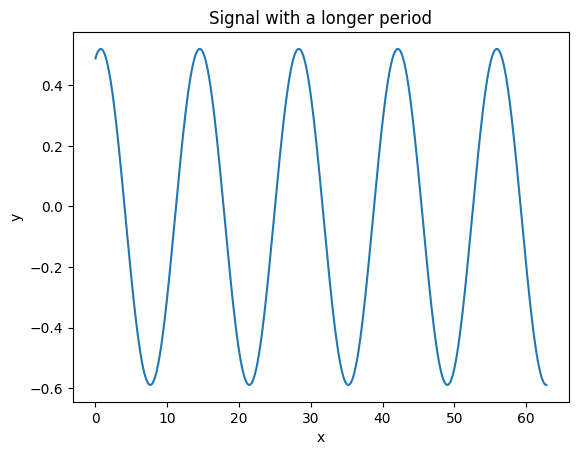

In [70]:
# Plot the signal
plt.plot(x_long, long_signal)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Signal with a longer period')
plt.show()

# Play the generated audio
sd.play(long_signal, samplerate=44100)
sd.wait()


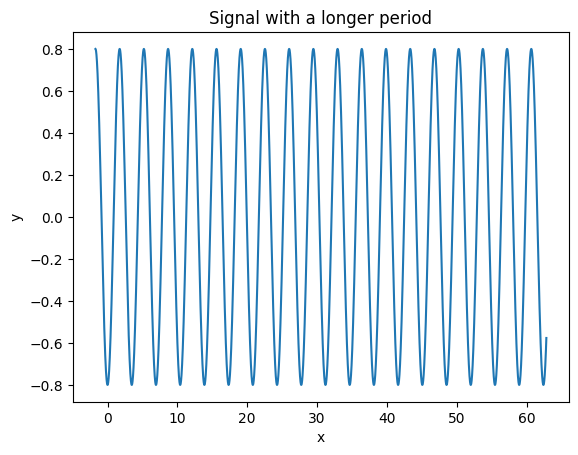

In [65]:
# Plot the signal
plt.plot(x_long, long_signal)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Signal with a longer period')
plt.show()

# Play the generated audio
sd.play(long_signal, samplerate=44100)
sd.wait()
